# Survival Analysis

Survival analysis is a branch of statistics for analyzing the expected duration of time until one or more events happen, such as death in biological organisms and failure in mechanical systems. Survival analyisis can be thought of *time to event analysis.*

Using the concept of survival analysis, we can study and predict the expectancy of customers to churn. We can use survival analysis to answetr a business question like;
 * Customer Analytics- how long will a customer remain loyal 
 * How long will a product exist in the market 
 * Business operatons- How long will a machine last before breakedown
 * Marketing Analytics- cohort analytics, Retention rate of each Marketing channel
 * Actuaries, the probability of the population to die in a perticulatr time range
 
 ### Kaplan-Meier Estimator
 Its a non-parametric statistic used to estimate the survival function from lifetime data.
 $$ \hat{S} (t) = \prod_{i:t_i\leq t}\frac{n_i-d_i}{n_i}$$
 
 Here, **ni** is deﬁned as the population at risk at time just prior to time **ti**; and **di** is defined as number of events occurred at time **ti**.
 
 
 Mathematically, for any time $t \in [t1, t2))$ , we have
$$S(t) = P(survive in [0, t1)) × P(survive in [t1, t] | survive in [0, t1))$$

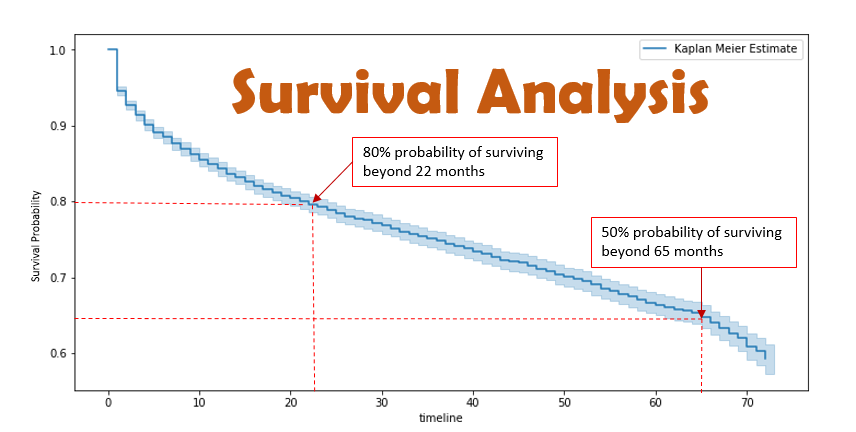

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines.plotting import plot_lifetimes
%pylab inline
figsize(12,6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(12,6))
sns.set_style('whitegrid')

<Figure size 864x432 with 0 Axes>

### Creating Survival curve with fictious data

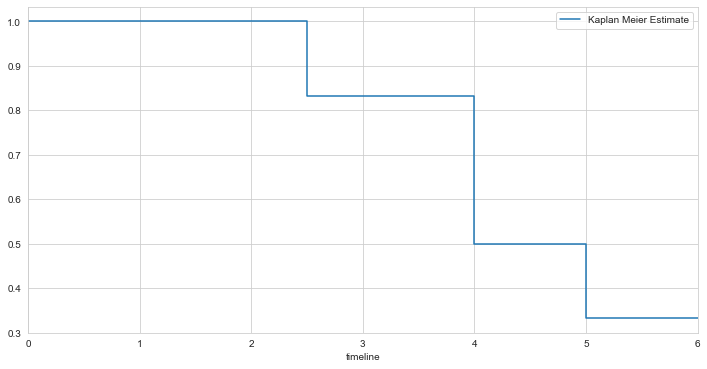

In [3]:
from lifelines import KaplanMeierFitter

### creating fictious data
durations = [5,6,6,2.5,4,4]
event_observed = [1, 0, 0, 1, 1, 1] #1=occure,0=dint occure

## create a kaplanmeier fitter
kmf=KaplanMeierFitter()

## fiting the data
kmf.fit(durations,event_observed,label='Kaplan Meier Estimate')
plt.figure(figsize=(12,6))
kmf.plot(ci_show=False) ## Dont show ci[confidence interval since our data is small]

In [4]:
cd C:\TUSHIAZ\Py\Survival analysis

C:\TUSHIAZ\Py\Survival analysis


In [5]:
df=pd.read_csv('Telco-Customer-Churn.csv')
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2050,4872-JCVCA,Female,0,Yes,No,71,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),47.60,3377.8,No
3660,2259-OUUSZ,Male,0,No,No,7,No,No phone service,DSL,No,...,Yes,Yes,No,No,One year,Yes,Credit card (automatic),35.50,249.55,No
4947,4735-ASGMA,Male,0,No,No,26,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.35,2515.3,Yes
4660,0883-EIBTI,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.50,31.55,Yes
3105,4429-WYGFR,Male,0,No,No,26,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),49.15,1237.3,No
4670,8741-LQOBK,Female,0,Yes,Yes,46,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),35.05,1620.25,No
6623,9248-OJYKK,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.45,76.45,Yes
1809,9606-PBKBQ,Male,1,Yes,No,32,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.00,2642.05,Yes
127,6734-PSBAW,Male,0,Yes,No,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),23.55,1723.95,No
2697,6461-SZMCV,Female,0,Yes,No,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),87.95,6365.35,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [7]:
## We convert the total charges to numerics
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

## REplace charn with 1 and 0
df['Churn']=df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(3), obj

In [8]:
## Imputing the missing value with the median
df.TotalCharges.fillna(value=df['TotalCharges'].median(),inplace=True)

In [9]:
## Create a list of all the cartegorical variables and view their distribution
cat_cols=[i for i in df.columns if df[i].dtype==object]
cat_cols.remove('customerID')

for i in cat_cols:
    print('Column Name: {}'.format(i))
    print(df[i].value_counts())
    print('*************************************************************')

Column Name: gender
Male      3555
Female    3488
Name: gender, dtype: int64
*************************************************************
Column Name: Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
*************************************************************
Column Name: Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
*************************************************************
Column Name: PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
*************************************************************
Column Name: MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
*************************************************************
Column Name: InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
*************************************************************
Column Name: OnlineSecurity
No                     3498

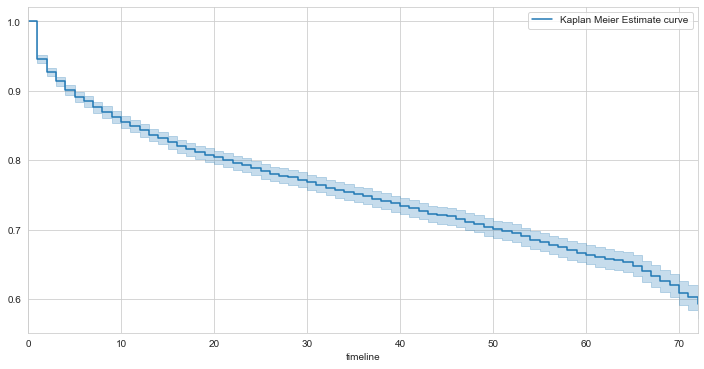

In [10]:
## Creating a KaplanMeier curve

durations=df['tenure']
event_observed=df['Churn'] ## Churn=1 and censured=0

kmf=KaplanMeierFitter()
kmf.fit(durations,event_observed,label='Kaplan Meier Estimate curve')

plt.figure(figsize=(12,6))
kmf.plot()


## Lets create Kaplan Meier Curves for cohorts

In [11]:
kmf=KaplanMeierFitter()
T=df['tenure']  ## Time to event
E=df['Churn']  ## event occured or censured

### Creating cohorts from 'Conract' column
groups=df['Contract']
ix1 = (groups == 'Month-to-month')   ## Cohort 1
ix2 = (groups == 'Two year')         ## Cohort 2
ix3 = (groups == 'One year')         ## Cohort 3

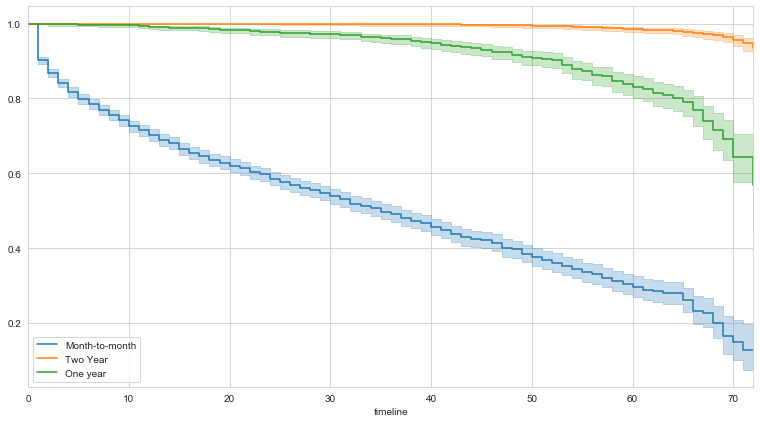

In [12]:
plt.figure(figsize=(13,7))

kmf.fit(T[ix1],E[ix1],label='Month-to-month') ## fit the cohort 1 data
ax=kmf.plot()

kmf.fit(T[ix2],E[ix2],label='Two Year') ## fit cohort 2
ax1=kmf.plot(ax=ax)

kmf.fit(T[ix3], E[ix3], label='One year')        ## fit the cohort 3 data
kmf.plot(ax=ax1)                                 ## Plot the KM curve for three cohort on same x and y axi

##### Cohorts based on the subscription to TV Channel

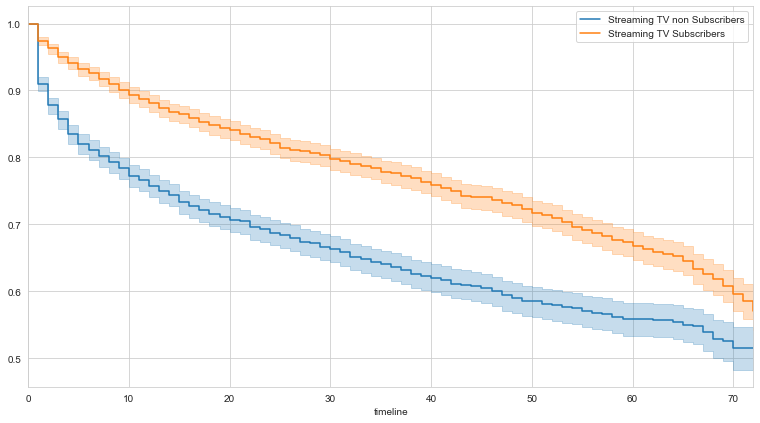

In [13]:
plt.figure(figsize=(13,7))

kmf1=KaplanMeierFitter()

groups=df['StreamingTV']
ix1=groups=='No' ## first cohort, non subscribers
ix2=groups=='Yes' ## Second cohort, Subscribers

## Fit the model
kmf1.fit(T[ix1],E[ix1],label='Streaming TV non Subscribers')
ax=kmf1.plot()

kmf1.fit(T[ix2],E[ix2],label='Streaming TV Subscribers')
kmf1.plot(ax=ax)

### Cox Proportional Harzard Model

Its is important to know the contribution of covariates(features) on the survival curve. This would help us in predicting the survival probability of an individual if we know the associated covariate values.

In [15]:
from lifelines import CoxPHFitter

In [17]:
## Creating a dataframe for the features by subseting the dataset

df1=df.loc[:,['tenure', 'Churn', 'gender', 'Partner',
              'Dependents', 'PhoneService','MonthlyCharges','SeniorCitizen','StreamingTV']]
df1.head(3)

,tenure,Churn,gender,Partner,Dependents,PhoneService,MonthlyCharges,SeniorCitizen,StreamingTV
0,1,0,Female,Yes,No,No,29.85,0,No
1,34,0,Male,No,No,Yes,56.95,0,No
2,2,1,Male,No,No,Yes,53.85,0,No


In [18]:
### Creating the dummy variables
df_dummy=pd.get_dummies(df1,drop_first=True)
df_dummy.head()

,tenure,Churn,MonthlyCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
0,1,0,29.85,0,0,1,0,0,0,0
1,34,0,56.95,0,1,0,0,1,0,0
2,2,1,53.85,0,1,0,0,1,0,0
3,45,0,42.30,0,1,0,0,0,0,0
4,2,1,70.70,0,0,0,0,1,0,0


In [19]:
### Crteating and fitting the cox proportional hazards model
cph=CoxPHFitter()

cph.fit(df_dummy,'tenure',event_col='Churn')

cph.print_summary()

The summary statistics above indicates the significance of the covariates in predicting the churn risk. 

Cheching on the **P Value** column, Gender doesn’t play any significant role in predicting the churn, whereas all the other covariates are significant.

Text(0.5, 1.0, 'Coeficients distribution')

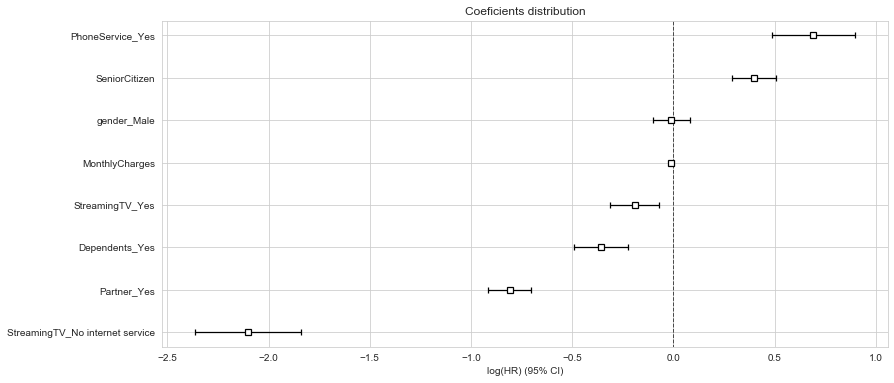

In [21]:
plt.figure(figsize=(13,6))
cph.plot()

plt.title('Coeficients distribution')

In [23]:
##### Prdicting the survival analysis curve for 6 random customers
sample=df_dummy.sample(6).iloc[:,2:]
sample

,MonthlyCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
1138,65.15,0,1,1,1,1,0,1
5650,59.80,0,1,1,1,1,0,0
449,105.50,0,1,1,1,1,0,1
946,20.50,0,1,1,1,1,1,0
2000,75.50,1,0,0,0,1,0,0
4992,30.05,0,1,1,0,0,0,0


<Figure size 936x432 with 0 Axes>

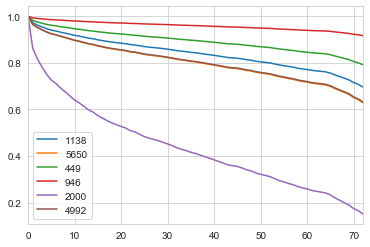

In [27]:
plt.figure(figsize=(13,6))

cph.predict_survival_function(sample).plot()